In [1]:
import pandas as pd
import numpy as np

# display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('training_data_original.csv')

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# check for duplicates in the track_name column
print(df['track_name'].duplicated().sum())

7946


In [5]:
# give me names of the duplicates songs 
duplicates = df[df['track_name'].duplicated(keep=False)]

In [6]:
# Sort duplicates on track_name
duplicates = duplicates.sort_values('track_name')

In [7]:
# Remove all songs with 0 popularity
df = df[df['track_popularity'] > 0]

In [8]:
# Remove duplicate songs with the same name but keep highest track_popularity
df = df.sort_values('track_popularity', ascending=False).drop_duplicates('track_name').sort_index()

In [9]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [10]:
# Convert duration_ms to minutes with 2 decimal places
df['duration_mins'] = df['duration_ms'] / 60000
df['duration_mins'] = df['duration_mins'].round(2)

#drop duration_ms
df = df.drop(columns=['duration_ms'])



In [11]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


In [12]:
# Convert the column to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Create a new column with the year
df['release_year'] = df['track_album_release_date'].dt.year

In [13]:
# remove columns track_id, track_name, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, 

df = df.drop(columns=['track_id', 'track_name', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id'])

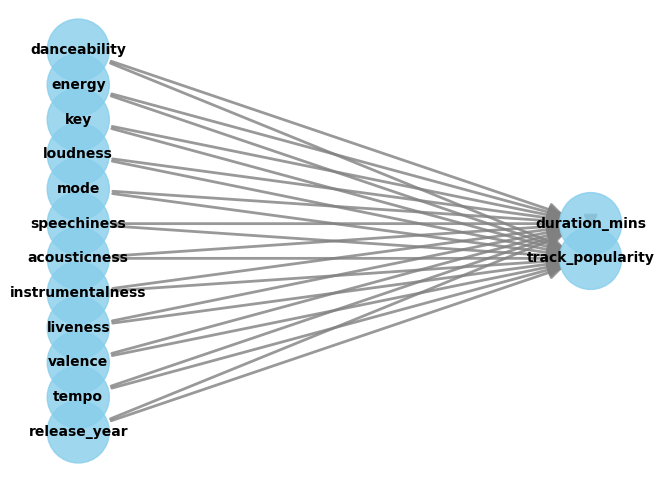

In [14]:
import dowhy
from dowhy import CausalModel

# Define the causal model
causal_model = CausalModel(
    data=df,
    treatment=['duration_mins'],  # Treatment variable
    outcome='track_popularity',  # Outcome variable
    common_causes=df.drop(columns=['track_artist','playlist_genre','playlist_subgenre'  ,'duration_mins', 'track_popularity']).columns.tolist(),  # Common causes
    effect_modifiers=['release_year']  # Optional: Effect modifiers
)

# Visualizing the model
causal_model.view_model()



In [15]:
# Identify the causal effect using the backdoor criterion (adjusting for common causes)
identified_effect = causal_model.identify_effect()

# Print the identified estimand
print(identified_effect)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
───────────────(E[track_popularity|mode,danceability,key,valence,release_year,
d[durationₘᵢₙₛ]                                                               

                                                                          
acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy])
                                                                          
Estimand assumption 1, Unconfoundedness: If U→{duration_mins} and U→track_popularity then P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy,U) = P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy)

### Estimand : 2
Estimand name: i

In [16]:
# Estimate the causal effect using a regression-based method
causal_estimate = causal_model.estimate_effect(identified_effect,
                                               method_name="backdoor.linear_regression",
                                               target_units="ate")  # Average Treatment Effect

# Print the causal estimate
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
───────────────(E[track_popularity|mode,danceability,key,valence,release_year,
d[durationₘᵢₙₛ]                                                               

                                                                          
acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy])
                                                                          
Estimand assumption 1, Unconfoundedness: If U→{duration_mins} and U→track_popularity then P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy,U) = P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumenta

In [19]:
estimate = causal_model.estimate_effect(identified_effect,
                                 method_name="backdoor.linear_regression",
                                 test_significance=True)
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
───────────────(E[track_popularity|mode,danceability,key,valence,release_year,
d[durationₘᵢₙₛ]                                                               

                                                                          
acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy])
                                                                          
Estimand assumption 1, Unconfoundedness: If U→{duration_mins} and U→track_popularity then P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumentalness,energy,U) = P(track_popularity|duration_mins,mode,danceability,key,valence,release_year,acousticness,loudness,liveness,tempo,speechiness,instrumenta